#### Įsikeliame duomenų analizei reikalingus modulius:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')

#### Nurodome duomenų vietą:

In [2]:
df = pd.read_csv(r"C:\Users\vomba\Desktop\ProgProj\FluorDujos.csv")

#### Peržiūrime duomenis

In [3]:
df.head()

,_type,_id,_revision,_page.next,eil_nr,kodas,trumpinys,salis,veiksmas,kiekis,atsiskaityta,prigimtis
0,datasets/gov/aaa/fdujos/FluorDujos,00172eff-d247-4756-abe7-20bc737101c9,41fe5b4d-ebe0-4a1c-a07e-b6336ef60ae4,NaN,a131012effc535c,R448A,NaN,Latvija,IS,60.00,2019,NE
1,datasets/gov/aaa/fdujos/FluorDujos,003a64f5-42bd-4037-a96d-c1b44c88d3e6,345c9106-8007-4fc3-a7e7-c165f53f16e3,NaN,5fe0636a1f5ca7d,NaN,HFC-32,Prancūzija,IV,8670.00,2019,NE
2,datasets/gov/aaa/fdujos/FluorDujos,0049f40c-084b-4b8f-b1ae-d94a9f1069a4,94648a8a-ebb9-4a71-a86c-8204b5bd4224,NaN,b78f6a5df8738e2,R410A,NaN,Slovakija,IS,11.50,2016,NE
3,datasets/gov/aaa/fdujos/FluorDujos,004e089d-890c-4346-82fa-9ec06bced3fc,f42c0e88-c08d-4814-ac9b-233d0112f447,NaN,8dfcb61a7a95992,R407F,NaN,Švedija,IV,514.00,2018,NE
4,datasets/gov/aaa/fdujos/FluorDujos,0076b9ab-8323-4c57-b79a-c4681b15545a,aa765256-131d-4fb7-bb07-27a55af2917a,NaN,ddb60b4631fd951,NaN,HFC-134a,Estija,IS,4193.09,2020,NE


#### Pašaliname stulpelius su kuriais nebus atliekama duomenų analizė:

In [4]:
df.drop(columns=['_type', '_id', '_revision', '_page.next'], inplace= True)

### Pakeičiame stulpelių pavadinimus patogesniais

In [5]:
df.rename(columns={'atsiskaityta':'metai'}, inplace=True)

#### Pašaliname pasikartojančias reikšmes:

In [6]:
df.drop_duplicates()

,eil_nr,kodas,trumpinys,salis,veiksmas,kiekis,metai,prigimtis
0,a131012effc535c,R448A,NaN,Latvija,IS,60.000,2019,NE
1,5fe0636a1f5ca7d,NaN,HFC-32,Prancūzija,IV,8670.000,2019,NE
2,b78f6a5df8738e2,R410A,NaN,Slovakija,IS,11.500,2016,NE
3,8dfcb61a7a95992,R407F,NaN,Švedija,IV,514.000,2018,NE
4,ddb60b4631fd951,NaN,HFC-134a,Estija,IS,4193.090,2020,NE
...,...,...,...,...,...,...,...,...
1126,52d0c46e91145c9,NaN,HFC-134a,Suomija,IS,7792.730,2022,NE
1127,7ba6c6c50d7686d,R410A,NaN,Latvija,IV,105.000,2018,NE
1128,88c5ceb83cfab39,NaN,HFC-125,Kinija,IM,85957.000,2015,NE
1129,86fd73d9dc2fb6a,NaN,CFC-11,Vokietija,EK,1811.299,2015,NaN


#### Pašaliname nulines vertes:

#### Pasitikriname duomenų struktūra visų stulpelių

In [7]:
print(df.dtypes)

eil_nr        object
kodas         object
trumpinys     object
salis         object
veiksmas      object
kiekis       float64
metai          int64
prigimtis     object
dtype: object


#### Surikiuojame duomenis pagal norimą stulpelį:

In [8]:
df['Kodas1']=df['kodas'].fillna('') + df['trumpinys'].fillna('')
gr=df.groupby('Kodas1')['kiekis'].sum()
asc5= gr.sort_values(ascending=False).head(10)
print(asc5)

Kodas1
HFC-134a      2.832276e+06
HFC-125       2.050486e+06
HFC-32        1.161138e+06
HFC-143a      1.006865e+06
HFC-152a      3.800000e+05
R404A         1.696250e+05
R410A         1.632707e+05
HFC-1234YF    1.400461e+05
R407C         9.157900e+04
R448A         2.737000e+04
Name: kiekis, dtype: float64


#### Bar chart:

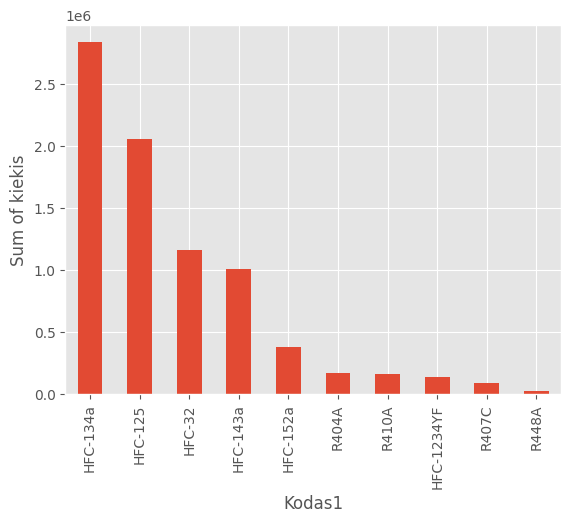

In [9]:
asc5.plot(kind='bar')
plt.xlabel('Kodas1')
plt.ylabel('Sum of kiekis')
plt.show()

#### Surandame HFC-134a importo duomenis pagal metus ir šalį

In [10]:
df['naujas']=df['kodas'].fillna('') + df['trumpinys'].fillna('')
df[['naujas', 'kodas', 'trumpinys']]
r=df.groupby(by=['metai','naujas'], as_index=False)['kiekis'].sum()
df2 = r.pivot(index='metai', columns='naujas', values='kiekis').drop(index=2023)

<Axes: xlabel='metai'>

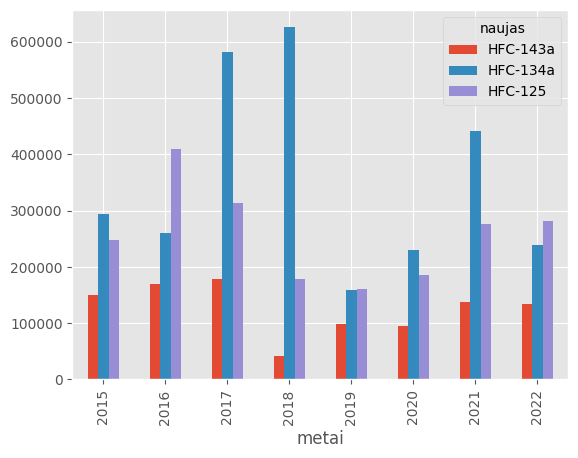

In [11]:
df2[['HFC-143a','HFC-134a','HFC-125']].plot(kind='bar')

<Axes: title={'center': 'HFC-134a 2022'}, xlabel='salis'>

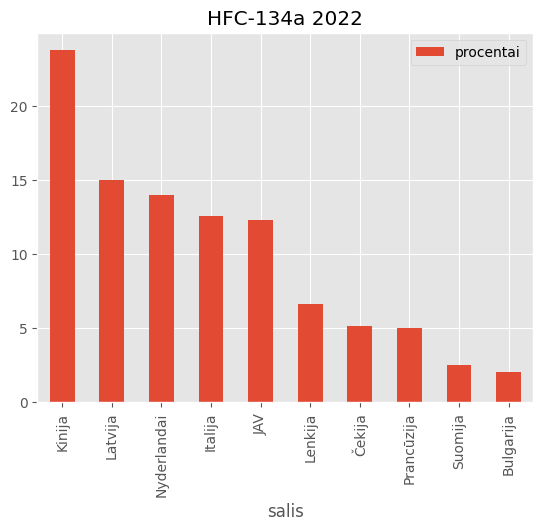

In [14]:
fdujos='HFC-32'
metai=2017


suma=df[(df['metai']==metai)&(df['naujas']==fdujos)&(df['kiekis'])]
suma = suma.set_index('salis')
pf=suma.groupby('salis')['kiekis'].sum()
suma['procentai']=(pf/pf.sum()*100)
suma = suma.reset_index()
ok=suma[['salis','procentai']].drop_duplicates()


ok.sort_values('procentai', ascending=False).head(10).plot(kind='bar', x='salis', y='procentai', title='HFC-134a 2022')